In [12]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import MultipleLocator
import seaborn as sns; sns.set()
sns.__version__

'0.11.1'

In [16]:
sns.set_style("ticks", {"xtick.major.size":15,"ytick.major.size":15})

plt.rc('font', family='Helvetica')
plt.rcParams['pdf.fonttype'] = 42

%config InlineBackend.figure_format = 'retina'

In [4]:
df_pair_1985_2009 = pd.read_pickle("/data/interdisciplinarity/df_pair_1985_2009.pkl")
df_paper_1985_2009 = pd.read_pickle("/data/interdisciplinarity/df_paper_1985_2009.pkl")
df_grant_1985_2009 = pd.read_pickle("/data/interdisciplinarity/df_grant_1985_2009.pkl")

In [106]:
import pickle

with open('/data/interdisciplinarity/df_paper_grant_stat.pkl', 'rb') as f:
    df_paper_grant_stat = pickle.load(f)

In [5]:
# Source: http://www.cookbook-r.com/Graphs/Plotting_means_and_error_bars_%28ggplot2%29/
# Produces count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   conf_interval: the percent range of the confidence interval (default is 95%)

import scipy as sp
from scipy.stats import t

def summarySE(data, measurevar, groupvars, conf_interval=0.95):
    def std(s):
        return np.std(s, ddof=1)
    def stde(s):
        return std(s) / np.sqrt(len(s))
    def ci(s):
        # Confidence interval multiplier for standard error
        # Calculate t-statistic for confidence interval: 
        # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
        ciMult = t.ppf(conf_interval/2.0 + .5, len(s)-1)
        return stde(s)*ciMult
    def ciUpper(s):
        return np.mean(s)+ci(s)
    def ciLower(s):
        return np.mean(s)-ci(s)
    
    data = data[groupvars+measurevar].groupby(groupvars).agg([len, np.mean, std, stde, ciUpper, ciLower, ci])

    data.reset_index(inplace=True)

    data.columns = groupvars+['_'.join(col).strip() for col in data.columns.values[len(groupvars):]]

    return data

## Supplementary Fig.1

In [5]:
paperITD_per_year = summarySE(df_paper_1985_2009, ['interdisciplinarity_citation'], ['pub_year'])
paperITD_per_year_grant = summarySE(df_paper_1985_2009, ['interdisciplinarity_citation'],
                                    ['grant_status','pub_year'])

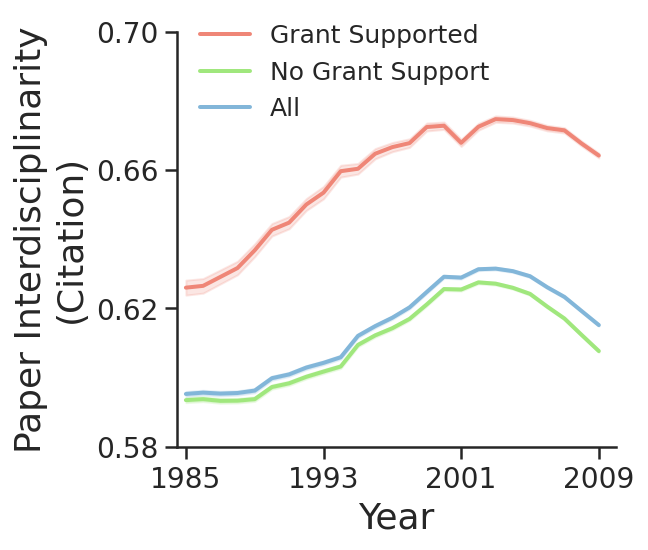

In [39]:
fig, ax = plt.subplots(figsize=(14*(1/3),4))

c1,c2,c3 = '#ef8677','#a0e77d','#82b6d9'

x1 = paperITD_per_year['pub_year']
mu1 = paperITD_per_year['interdisciplinarity_citation_mean']
ci1 = paperITD_per_year['interdisciplinarity_citation_ci']
x2 = paperITD_per_year_grant[paperITD_per_year_grant['grant_status']==1]['pub_year']
mu2 = paperITD_per_year_grant[paperITD_per_year_grant['grant_status']==1]['interdisciplinarity_citation_mean']
ci2 = paperITD_per_year_grant[paperITD_per_year_grant['grant_status']==1]['interdisciplinarity_citation_ci']
x3 = paperITD_per_year_grant[paperITD_per_year_grant['grant_status']==0]['pub_year']
mu3 = paperITD_per_year_grant[paperITD_per_year_grant['grant_status']==0]['interdisciplinarity_citation_mean']
ci3 = paperITD_per_year_grant[paperITD_per_year_grant['grant_status']==0]['interdisciplinarity_citation_ci']

ax.plot(x2, mu2, lw=2, label='Grant Supported', color=c1)
plt.plot(x3, mu3, lw=2, label='No Grant Support', color=c2)
plt.plot(x1, mu1, lw=2, label='All', color=c3)
plt.fill_between(x2, mu2+ci2, mu2-ci2, facecolor='C0', alpha=0.2, color=c1)
plt.fill_between(x3, mu3+ci3, mu3-ci3, facecolor='C1', alpha=0.2, color=c2)
plt.fill_between(x1, mu1+ci1, mu1-ci1, facecolor='C2', alpha=0.2, color=c3)

ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Paper Interdisciplinarity\n(Citation)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.yticks([0.58, 0.62, 0.66, 0.70])
ax.set_yticklabels(['0.58', '0.62', '0.66', '0.70'])
plt.ylim(0.58, 0.7)
plt.xticks([1985, 1993, 2001, 2009])
ax.set_xticklabels(['1985', '1993', '2001', '2009'])
plt.xlim(1984.5, 2010)

plt.legend(loc='lower left', bbox_to_anchor=(0.0, 0.73),
           fontsize=12.5, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#####-------------#####
plt.tight_layout()
plt.show()

fig.savefig('./fig/supp_fig-1.pdf', format='pdf', dpi=700, bbox_inches='tight')

## Supplementary Fig.2

In [13]:
df_tmp = df_grant_1985_2009[['grant_id','interdisciplinarity_cutoff_norm','start_year','paper']].drop_duplicates()
grantITD_per_year = summarySE(df_tmp, ['interdisciplinarity_cutoff_norm'], ['start_year'])
grantITD_per_year_paper = summarySE(df_tmp, ['interdisciplinarity_cutoff_norm'], ['start_year','paper'])

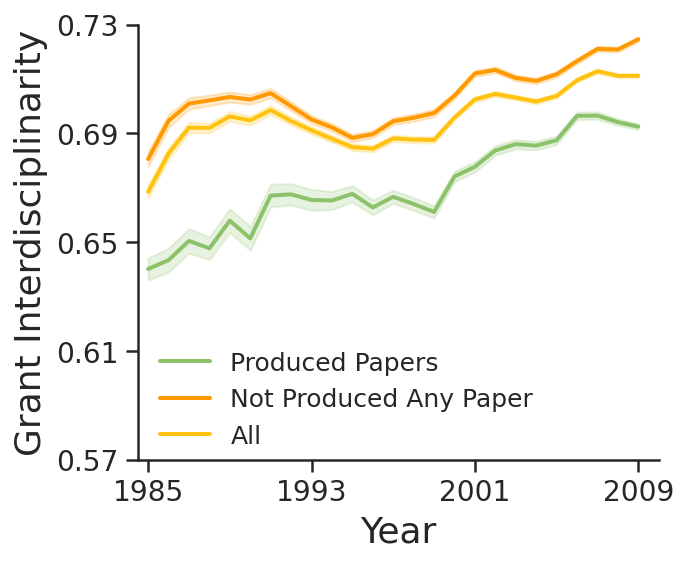

In [20]:
fig, ax = plt.subplots(figsize=(14*(1/3),4))

c1,c2,c3 = '#8cc269', '#ff9900', '#ffc20e'

x1 = grantITD_per_year['start_year']
mu1 = grantITD_per_year['interdisciplinarity_cutoff_norm_mean']
ci1 = grantITD_per_year['interdisciplinarity_cutoff_norm_ci']
x2 = grantITD_per_year_paper[grantITD_per_year_paper['paper']==1]['start_year']
mu2 = grantITD_per_year_paper[grantITD_per_year_paper['paper']==1]['interdisciplinarity_cutoff_norm_mean']
ci2 = grantITD_per_year_paper[grantITD_per_year_paper['paper']==1]['interdisciplinarity_cutoff_norm_ci']
x3 = grantITD_per_year_paper[grantITD_per_year_paper['paper']==0]['start_year']
mu3 = grantITD_per_year_paper[grantITD_per_year_paper['paper']==0]['interdisciplinarity_cutoff_norm_mean']
ci3 = grantITD_per_year_paper[grantITD_per_year_paper['paper']==0]['interdisciplinarity_cutoff_norm_ci']

ax.plot(x2, mu2, lw=2, label='Produced Papers', color=c1)
ax.plot(x3, mu3, lw=2, label='Not Produced Any Paper', color=c2)
ax.plot(x1, mu1, lw=2, label='All', color=c3)
ax.fill_between(x2, mu2+ci2, mu2-ci2, facecolor='C0', alpha=0.2, color=c1)
ax.fill_between(x3, mu3+ci3, mu3-ci3, facecolor='C1', alpha=0.2, color=c2)
ax.fill_between(x1, mu1+ci1, mu1-ci1, facecolor='C2', alpha=0.2, color=c3)

ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Grant Interdisciplinarity', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.yticks([0.57, 0.61, 0.65, 0.69, 0.73])
ax.set_yticklabels(['0.57', '0.61', '0.65', '0.69', '0.73'])
plt.ylim(0.57, 0.73)
plt.xticks([1985, 1993, 2001, 2009])
ax.set_xticklabels(['1985', '1993', '2001', '2009'])
plt.xlim(1984.5, 2010)

ax.legend(loc='lower left', bbox_to_anchor=(0.0, -0.025),
          fontsize=12.5, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#####-------------#####
plt.show()

fig.savefig('./fig/supp_fig-2.pdf', format='pdf', dpi=700, bbox_inches='tight')

## Supplementary Fig.4

In [6]:
dict_grant_attributes = {}
for row in df_pair_1985_2009.itertuples():
    grant_id = row.grant_id
    paper_itd_category = row.interdisciplinarity_reference_interval
    
    if grant_id not in dict_grant_attributes:
        dict_grant_attributes[grant_id] = {}       
        dict_grant_attributes[grant_id]['num_paper_itd_top_10'] = 0
        dict_grant_attributes[grant_id]['num_paper_non_itd_top_10'] = 0
        dict_grant_attributes[grant_id]['num_paper_itd_bottom_10'] = 0
        dict_grant_attributes[grant_id]['num_paper_non_itd_bottom_10'] = 0
        
    if paper_itd_category >= 95:
        dict_grant_attributes[grant_id]['num_paper_itd_top_10'] += 1
    else:
        dict_grant_attributes[grant_id]['num_paper_non_itd_top_10'] += 1
        
    if paper_itd_category <= 10:
        dict_grant_attributes[grant_id]['num_paper_itd_bottom_10'] += 1
    else:
        dict_grant_attributes[grant_id]['num_paper_non_itd_bottom_10'] += 1
        
df_tmp = pd.DataFrame.from_dict(dict_grant_attributes, 
                                orient='index').reset_index().rename(columns={'index': 'grant_id'})

df_tmp['prop_paper_itd_top_10'] = df_tmp['num_paper_itd_top_10'] / (df_tmp['num_paper_itd_top_10'] + df_tmp['num_paper_non_itd_top_10'])
df_tmp['prop_paper_itd_bottom_10'] = df_tmp['num_paper_itd_bottom_10'] / (df_tmp['num_paper_itd_bottom_10'] + df_tmp['num_paper_non_itd_bottom_10'])

df_grant_attributes = df_pair_1985_2009[['grant_id','grant_interdisciplinarity_interval']].drop_duplicates().copy()
df_grant_attributes = pd.merge(df_grant_attributes, df_tmp, how='inner', on='grant_id')

propPaperTopITD_per_grantITD = summarySE(df_grant_attributes, ['prop_paper_itd_top_10'], ['grant_interdisciplinarity_interval'])
propPaperBottomITD_per_grantITD = summarySE(df_grant_attributes, ['prop_paper_itd_bottom_10'], ['grant_interdisciplinarity_interval'])

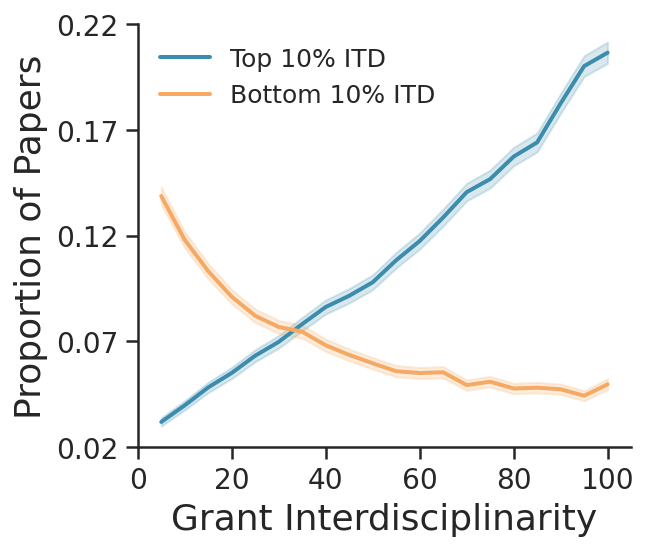

In [9]:
fig, ax = plt.subplots(figsize=(14*(1/3),4))

c1,c2 = '#3C8DAD','#F5A962'

x1 = propPaperTopITD_per_grantITD['grant_interdisciplinarity_interval']
mu1 = propPaperTopITD_per_grantITD['prop_paper_itd_top_10_mean']
ci1 = propPaperTopITD_per_grantITD['prop_paper_itd_top_10_ci']
x2 = propPaperBottomITD_per_grantITD['grant_interdisciplinarity_interval']
mu2 = propPaperBottomITD_per_grantITD['prop_paper_itd_bottom_10_mean']
ci2 = propPaperBottomITD_per_grantITD['prop_paper_itd_bottom_10_ci']

ax.plot(x1, mu1, lw=2, label='Top 10% ITD', color=c1)
ax.plot(x2, mu2, lw=2, label='Bottom 10% ITD', color=c2)
ax.fill_between(x1, mu1+ci1, mu1-ci1, facecolor='C0', alpha=0.2, color=c1)
ax.fill_between(x2, mu2+ci2, mu2-ci2, facecolor='C1', alpha=0.2, color=c2)

ax.set_xlabel('Grant Interdisciplinarity', fontsize=18)
ax.set_ylabel('Proportion of Papers', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.gca().xaxis.set_major_locator(MultipleLocator(20))
plt.xlim(0, 105)
plt.yticks([0.02, 0.07, 0.12, 0.17, 0.22])
ax.set_yticklabels(['0.02', '0.07', '0.12', '0.17', '0.22'])
plt.ylim(0.02, 0.22)

ax.legend(loc='lower left', bbox_to_anchor=(0.0, 0.75),
          fontsize=12.5, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#####-------------#####
plt.tight_layout()
plt.show()

fig.savefig('./fig/supp_fig-2.pdf', format='pdf', dpi=700, bbox_inches='tight')

## Supplementary Fig.5

In [10]:
hitRate_per_paperITD = summarySE(df_paper_1985_2009, ['c_hit_rate_5_lvl-0'], ['interdisciplinarity_citation_interval'])
hitRate_per_paperITD_grant = summarySE(df_paper_1985_2009, ['c_hit_rate_5_lvl-0'],
                                       ['grant_status','interdisciplinarity_citation_interval'])

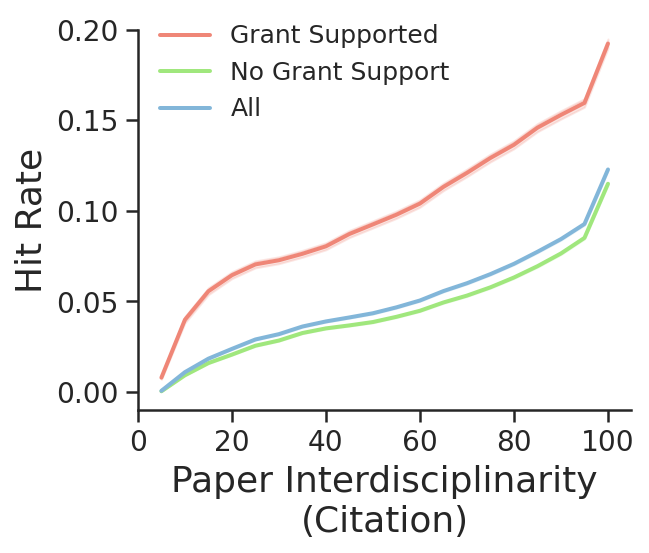

In [11]:
fig, ax = plt.subplots(figsize=(14*(1/3),4))

c1,c2,c3 = '#ef8677','#a0e77d','#82b6d9'

x1 = hitRate_per_paperITD['interdisciplinarity_citation_interval']
mu1 = hitRate_per_paperITD['c_hit_rate_5_lvl-0_mean']
ci1 = hitRate_per_paperITD['c_hit_rate_5_lvl-0_ci']
x2 = hitRate_per_paperITD_grant[hitRate_per_paperITD_grant['grant_status']==1]['interdisciplinarity_citation_interval']
mu2 = hitRate_per_paperITD_grant[hitRate_per_paperITD_grant['grant_status']==1]['c_hit_rate_5_lvl-0_mean']
ci2 = hitRate_per_paperITD_grant[hitRate_per_paperITD_grant['grant_status']==1]['c_hit_rate_5_lvl-0_ci']
x3 = hitRate_per_paperITD_grant[hitRate_per_paperITD_grant['grant_status']==0]['interdisciplinarity_citation_interval']
mu3 = hitRate_per_paperITD_grant[hitRate_per_paperITD_grant['grant_status']==0]['c_hit_rate_5_lvl-0_mean']
ci3 = hitRate_per_paperITD_grant[hitRate_per_paperITD_grant['grant_status']==0]['c_hit_rate_5_lvl-0_ci']

ax.plot(x2, mu2, lw=2, label='Grant Supported', color=c1)
ax.plot(x3, mu3, lw=2, label='No Grant Support', color=c2)
ax.plot(x1, mu1, lw=2, label='All', color=c3)
ax.fill_between(x2, mu2+ci2, mu2-ci2, facecolor='C0', alpha=0.2, color=c1)
ax.fill_between(x3, mu3+ci3, mu3-ci3, facecolor='C1', alpha=0.2, color=c2)
ax.fill_between(x1, mu1+ci1, mu1-ci1, facecolor='C2', alpha=0.2, color=c3)

ax.set_xlabel('Paper Interdisciplinarity\n(Citation)', fontsize=18)
ax.set_ylabel('Hit Rate', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.gca().xaxis.set_major_locator(MultipleLocator(20))
plt.xlim(0, 105)
plt.ylim(-0.01, 0.2)

ax.legend(loc='lower left', bbox_to_anchor=(0.0, 0.7),
          fontsize=12.5, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#####-------------#####
plt.tight_layout()
plt.show()

fig.savefig('./fig/supp_fig-3.pdf', format='pdf', dpi=700, bbox_inches='tight')

## Supplementary Fig.6

In [92]:
df_tmp = df_pair_1985_2009[['grant_interdisciplinarity_interval','c_hit_rate_5_lvl-0','interdisciplinarity_citation_interval_5']]
hitRate_per_grantITD_paperITD = summarySE(df_tmp, ['c_hit_rate_5_lvl-0'],
                                          ['grant_interdisciplinarity_interval','interdisciplinarity_citation_interval_5'])

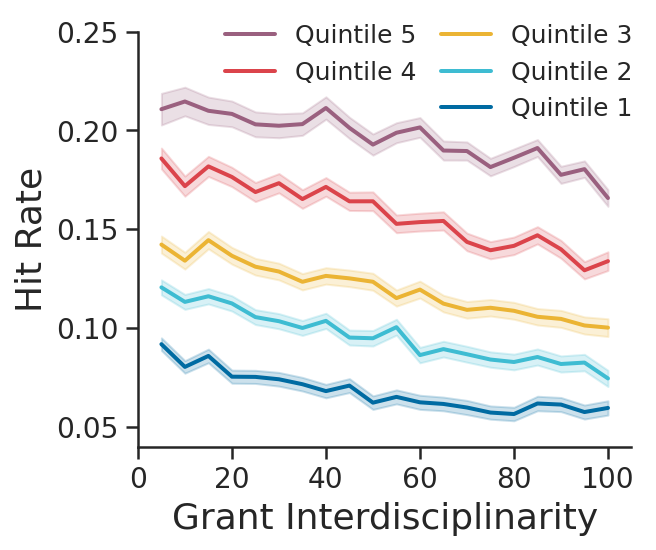

In [219]:
fig, ax = plt.subplots(figsize=(14*(1/3),4))

c = ['#006BA2','#3EBCD2','#EBB434','#DB444B','#9A607F']

tmp_x = []
tmp_mu = []
tmp_ci = []
for i in range(20,101,20):
    tmp_x.append(hitRate_per_grantITD_paperITD[hitRate_per_grantITD_paperITD['interdisciplinarity_citation_interval_5']==i]['grant_interdisciplinarity_interval'])
    tmp_mu.append(hitRate_per_grantITD_paperITD[hitRate_per_grantITD_paperITD['interdisciplinarity_citation_interval_5']==i]['c_hit_rate_5_lvl-0_mean'])
    tmp_ci.append(hitRate_per_grantITD_paperITD[hitRate_per_grantITD_paperITD['interdisciplinarity_citation_interval_5']==i]['c_hit_rate_5_lvl-0_ci'])

for i in range(0,5):
    ax.plot(tmp_x[i], tmp_mu[i], lw=2, label='Quintile {}'.format(i+1), color=c[i])
    ax.fill_between(tmp_x[i], tmp_mu[i]+tmp_ci[i], tmp_mu[i]-tmp_ci[i],
                    color=c[i], alpha=0.2)

ax.set_xlabel('Grant Interdisciplinarity', fontsize=18)
ax.set_ylabel('Hit Rate', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.gca().xaxis.set_major_locator(MultipleLocator(20))
plt.xlim(0, 105)
plt.ylim(0.04, 0.25)

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
h = list(handles)
h.insert(2, plt.plot([], [], color=(0,0,0,0), label=' ')[0])
l = list(labels)
l.insert(2, '')
ax.legend(h, l, loc='lower left', bbox_to_anchor=(0.13, 0.73),
          fontsize=12.5, frameon=False, ncol=2, columnspacing=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#####-------------#####
plt.tight_layout()
plt.show()

fig.savefig('./fig/supp_fig-4.pdf', format='pdf', dpi=700, bbox_inches='tight')

# ========== Additional Figures ==========

## Supplementary Fig.A

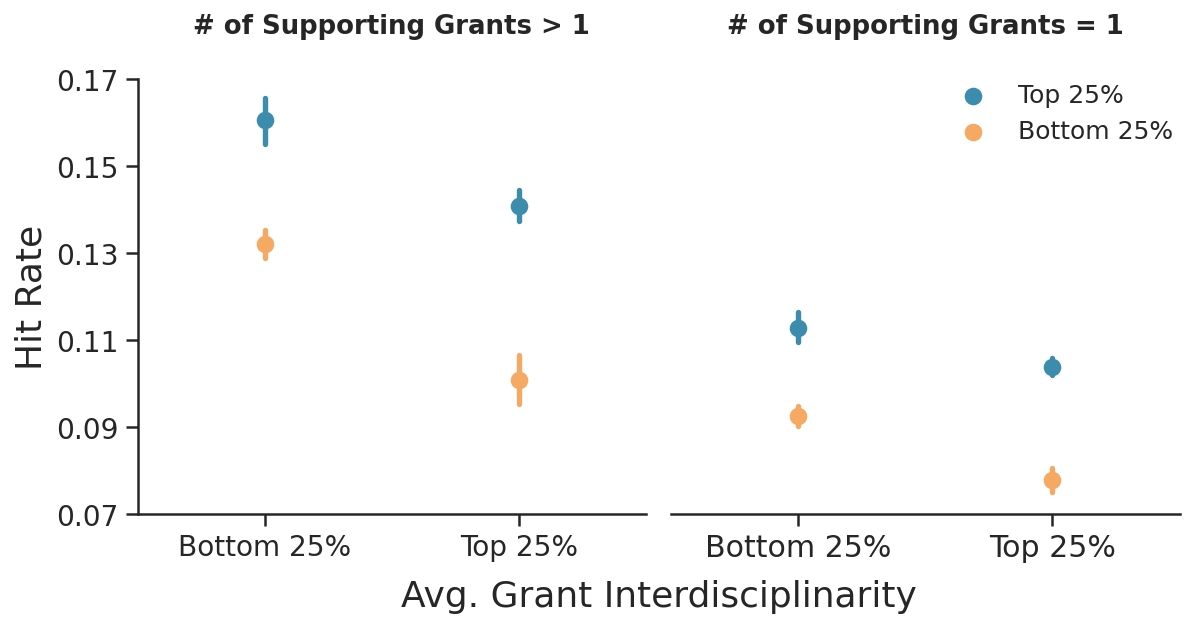

In [218]:
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(14*(2/3),4))
gs = GridSpec(1, 2, figure=fig, wspace=0.05)
c1,c2 = '#3C8DAD','#F5A962'

df_tmp = df_paper_grant_stat[((df_paper_grant_stat['mean_grant_interdisciplinarity_quartile']==25) |
                              (df_paper_grant_stat['mean_grant_interdisciplinarity_quartile']==100)) &
                             ((df_paper_grant_stat['interdisciplinarity_reference_quartile']==25) |
                              (df_paper_grant_stat['interdisciplinarity_reference_quartile']==100))]

ax = fig.add_subplot(gs[0,0])
ax = sns.pointplot(x='mean_grant_interdisciplinarity_quartile', y='c_hit_rate_5_lvl-0',
                   hue='interdisciplinarity_reference_quartile', palette=[c1,c2],
                   order=[25,100], hue_order=[100,25], join=False, 
                   data=df_tmp[df_tmp['num_grant_category_capped_5']!='1'])

plt.yticks([0.07, 0.09, 0.11, 0.13, 0.15, 0.17])
ax.set_yticklabels(['0.07', '0.09', '0.11', '0.13', '0.15', '0.17'])
plt.ylim(0.07, 0.17)
ax.set_xticklabels(['Bottom 25%', 'Top 25%'])

plt.ylabel('Hit Rate', fontsize=18)
plt.xlabel('Avg. Grant Interdisciplinarity', fontsize=18)
ax.xaxis.set_label_coords(1.025, -0.15)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend([],[], frameon=False)
ax.text(0.89, 1.15, '# of Supporting Grants > 1', transform=ax.transAxes,
        fontsize=13, fontweight='bold', va='top', ha='right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = fig.add_subplot(gs[0,1])
ax = sns.pointplot(x='mean_grant_interdisciplinarity_quartile', y='c_hit_rate_5_lvl-0',
                   hue='interdisciplinarity_reference_quartile', palette=[c1,c2],
                   order=[25,100], hue_order=[100,25], join=False, legend_out=False, 
                   data=df_tmp[df_tmp['num_grant_category_capped_5']=='1'])

plt.ylim(0.07, 0.17)
ax.set_xticklabels(['Bottom 25%', 'Top 25%'])

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(loc='lower left', bbox_to_anchor=(0.5, 0.8), fontsize=12.5, frameon=False,
          handles=leg_handles, labels=['Top 25%', 'Bottom 25%'])
ax.text(0.89, 1.15, '# of Supporting Grants = 1', transform=ax.transAxes,
        fontsize=13, fontweight='bold', va='top', ha='right')
    
plt.tick_params(axis='both', which='major', labelsize=15, left=False)
ax.set(xlabel=None)
ax.set(yticklabels=[])
ax.set(ylabel=None)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#####-------------#####
plt.show()

fig.savefig('./fig/supp_fig-5.pdf', format='pdf', dpi=700, bbox_inches='tight')

## Supplementary Fig.B

In [52]:
df_tmp = df_pair_1985_2009[['c_hit_rate_5_lvl-0','grant_interdisciplinarity_interval','funding_usd_interval']]
hitRate_per_grantITD_funding = summarySE(df_tmp, ['c_hit_rate_5_lvl-0'], 
                                         ['grant_interdisciplinarity_interval','funding_usd_interval'])

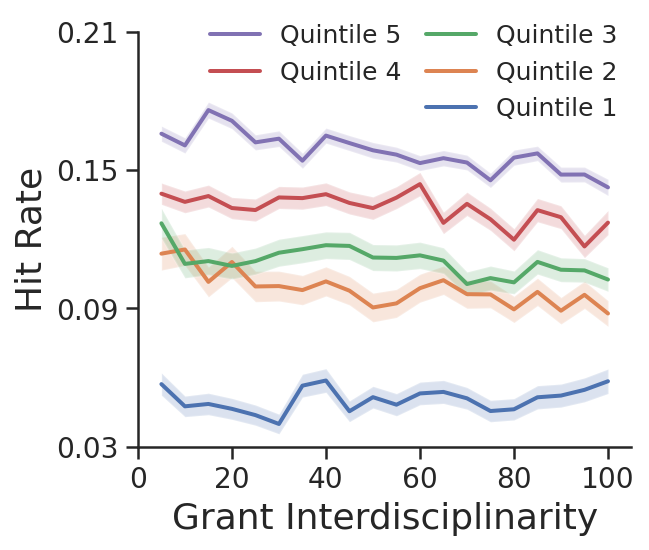

In [104]:
fig, ax = plt.subplots(figsize=(14*(1/3),4))

tmp_x = []
tmp_mu = []
tmp_ci = []
for i in range(20,101,20):
    tmp_x.append(hitRate_per_grantITD_funding[hitRate_per_grantITD_funding['funding_usd_interval']==i]['grant_interdisciplinarity_interval'])
    tmp_mu.append(hitRate_per_grantITD_funding[hitRate_per_grantITD_funding['funding_usd_interval']==i]['c_hit_rate_5_lvl-0_mean'])
    tmp_ci.append(hitRate_per_grantITD_funding[hitRate_per_grantITD_funding['funding_usd_interval']==i]['c_hit_rate_5_lvl-0_ci'])

for i in range(0,5):
    ax.plot(tmp_x[i], tmp_mu[i], lw=2, label='Quintile {}'.format(i+1))
    ax.fill_between(tmp_x[i], tmp_mu[i]+tmp_ci[i], tmp_mu[i]-tmp_ci[i],
                    facecolor='C{}'.format(i), alpha=0.2)

ax.set_xlabel('Grant Interdisciplinarity', fontsize=18)
ax.set_ylabel('Hit Rate', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.gca().xaxis.set_major_locator(MultipleLocator(20))
plt.xlim(0, 105)
plt.yticks([0.03, 0.09, 0.15, 0.21])
ax.set_yticklabels(['0.03', '0.09', '0.15', '0.21'])
plt.ylim(0.03, 0.21)

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
h = list(handles)
h.insert(2, plt.plot([], [], color=(0,0,0,0), label=' ')[0])
l = list(labels)
l.insert(2, '')
ax.legend(h, l, loc='lower left', bbox_to_anchor=(0.1, 0.73),
          fontsize=12.5, frameon=False, ncol=2, columnspacing=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#####-------------#####
plt.tight_layout()
plt.show()

fig.savefig('./fig/supp_fig-3.pdf', format='pdf', dpi=700, bbox_inches='tight')